In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

import seaborn as sns

sns.set()

In [2]:
df =  pd.read_excel('../1_Data/datasets/2022_smd_hourly.xlsx' ,sheet_name='ISO NE CA')
df['Date'] = df.Date + pd.to_timedelta(df.Hr_End, unit='h')
df.sort_values('Date', inplace=True)

In [3]:
df.head(5)

,Date,Hr_End,DA_Demand,RT_Demand,DA_LMP,DA_EC,DA_CC,DA_MLC,RT_LMP,RT_EC,...,RT_MLC,Dry_Bulb,Dew_Point,System_Load,Reg_Service_Price,Reg_Capacity_Price,Min_5min_RSP,Max_5min_RSP,Min_5min_RCP,Max_5min_RCP
0,2022-01-01 01:00:00,1,10845.4,10789.727,32.22,32.35,-0.12,-0.01,25.90,25.95,...,-0.05,44,43,10983,0.237500,11.284167,0.05,0.3,9.99,20.12
1,2022-01-01 02:00:00,2,10593.7,10320.195,32.12,32.31,-0.14,-0.05,25.87,25.87,...,0.00,44,43,10510,0.300000,11.383333,0.30,0.3,10.54,11.46
2,2022-01-01 03:00:00,3,10207.3,9972.371,30.76,30.85,0.00,-0.09,27.51,27.50,...,0.01,44,43,10161,0.112500,12.375000,0.05,0.3,11.46,12.68
3,2022-01-01 04:00:00,4,10026.4,9779.883,29.60,29.69,0.00,-0.09,25.14,25.13,...,0.01,44,43,9970,0.258333,11.763333,0.05,0.3,11.58,12.68
4,2022-01-01 05:00:00,5,10283.0,9777.168,30.78,30.86,0.00,-0.08,29.28,29.27,...,0.01,44,43,9973,0.112500,12.405000,0.05,0.3,11.58,12.68


In [4]:
df = df.sort_values('Date')
df['Date'] = pd.to_datetime(df['Date'] )
df = df.set_index('Date')
df

,Hr_End,DA_Demand,RT_Demand,DA_LMP,DA_EC,DA_CC,DA_MLC,RT_LMP,RT_EC,RT_CC,RT_MLC,Dry_Bulb,Dew_Point,System_Load,Reg_Service_Price,Reg_Capacity_Price,Min_5min_RSP,Max_5min_RSP,Min_5min_RCP,Max_5min_RCP
Date,,,,,,,,,,,,,,,,,,,,
2022-01-01 01:00:00,1,10845.4,10789.727,32.22,32.35,-0.12,-0.01,25.90,25.95,0.0,-0.05,44,43,10983,0.237500,11.284167,0.05,0.30,9.99,20.12
2022-01-01 02:00:00,2,10593.7,10320.195,32.12,32.31,-0.14,-0.05,25.87,25.87,0.0,0.00,44,43,10510,0.300000,11.383333,0.30,0.30,10.54,11.46
2022-01-01 03:00:00,3,10207.3,9972.371,30.76,30.85,0.00,-0.09,27.51,27.50,0.0,0.01,44,43,10161,0.112500,12.375000,0.05,0.30,11.46,12.68
2022-01-01 04:00:00,4,10026.4,9779.883,29.60,29.69,0.00,-0.09,25.14,25.13,0.0,0.01,44,43,9970,0.258333,11.763333,0.05,0.30,11.58,12.68
2022-01-01 05:00:00,5,10283.0,9777.168,30.78,30.86,0.00,-0.08,29.28,29.27,0.0,0.01,44,43,9973,0.112500,12.405000,0.05,0.30,11.58,12.68
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-31 20:00:00,20,12910.4,13191.898,39.01,38.97,0.00,0.04,26.36,26.27,0.0,0.09,51,50,13489,0.335000,109.751667,0.01,0.40,9.52,123.90
2022-12-31 21:00:00,21,11992.9,12575.713,38.88,38.88,0.00,0.00,25.38,25.31,0.0,0.07,51,50,12868,0.075000,21.605833,0.01,0.40,12.71,118.36
2022-12-31 22:00:00,22,11444.8,11983.841,38.68,38.73,0.00,-0.05,31.80,31.69,0.0,0.11,50,49,12264,0.230000,10.656667,0.01,0.25,10.46,12.82


# Adjust features

In [5]:
df['RT_LMP_24hr_ahead'] = df['RT_LMP'].shift(-24)
df.dropna(inplace=True)

In [6]:
features = ['Hr_End', 'DA_Demand', 'DA_LMP', 'DA_EC', 'DA_CC', 'DA_MLC', 'Dry_Bulb', 'Dew_Point', 'System_Load', 'RT_Demand']
X = df[features]
y = df[['RT_LMP_24hr_ahead']]

# Check feature importance

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error

# # Train/test split
train_size = int(len(X) * 0.9)
X_train, X_test = X.iloc[:train_size], X.iloc[train_size:]
y_train, y_test = y.iloc[:train_size], y.iloc[train_size:]

# Model pipeline
pipeline = make_pipeline(StandardScaler(), SVR(kernel='rbf'))
pipeline.fit(X_train, y_train)

# Prediction and Evaluation
y_pred = pipeline.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Mean Squared Error: 12640.06926010768


In [8]:
from sklearn.inspection import permutation_importance

#  feature importance
result = permutation_importance(pipeline, X_test, y_test, n_repeats=3, random_state=0, n_jobs=-1)

importance_df = pd.DataFrame({
    'features': X.columns,
    'importance_mean': result.importances_mean,
    'importance_std': result.importances_std
})
print(importance_df.sort_values(by='importance_mean', ascending=False))

      features  importance_mean  importance_std
2       DA_LMP         0.059840        0.003566
3        DA_EC         0.059744        0.003583
5       DA_MLC         0.019726        0.003689
1    DA_Demand         0.007442        0.002423
6     Dry_Bulb         0.006079        0.001238
9    RT_Demand         0.005786        0.002530
8  System_Load         0.005683        0.002505
7    Dew_Point         0.002900        0.000553
0       Hr_End         0.002146        0.001088
4        DA_CC        -0.008799        0.002232


DA_EC (Day-Ahead Energy Component) and DA_LMP (Day-Ahead Locational Marginal Pricing) are showing the highest importance in predicting RT_LMP. This makes sense as these features are directly related to pricing variables in the energy market.
DA_MLC (Day-Ahead Marginal Loss Component) also shows some importance, which suggests that transmission losses incorporated into day-ahead predictions are somewhat predictive of real-time prices.
The relatively lower importance of DA_Demand and System_Load compared to day-ahead pricing components indicates that price is more sensitive to market conditions and costs than to load variables themselves in your model.
Negative importance for DA_CC (Day-Ahead Congestion Component) suggests that in the model's current form, this feature might be detracting from the model's predictive accuracy, or it might be reflecting multicollinearity issues where its effect is captured by other variables.

### RT Demand seems important but not the most according to this sample

# Parameter tuning

In [9]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'svr__C': [0.1, 1, 10, 100],
    'svr__gamma': [0.001, 0.01, 0.1, 1],
    'svr__epsilon': [0.01, 0.1, 1]
}
grid_search = GridSearchCV(pipeline, param_grid, cv=3, verbose=2, n_jobs=-1)
grid_search.fit(X_train, y_train)

print(f"Best parameters: {grid_search.best_params_}")
print(f"Best cross-validation score: {grid_search.best_score_}")

Fitting 3 folds for each of 48 candidates, totalling 144 fits


/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

Best parameters: {'svr__C': 100, 'svr__epsilon': 1, 'svr__gamma': 0.001}
Best cross-validation score: 0.3267688868186945


# Best model for 24hrs ahead error scores

MAE for the first 24 hours: 11.578142317066755
MSE for the first 24 hours: 177.05019743712776
RMSE for the first 24 hours: 13.306021097124706
R-squared for the first 24 hours: 0.39770192207183164


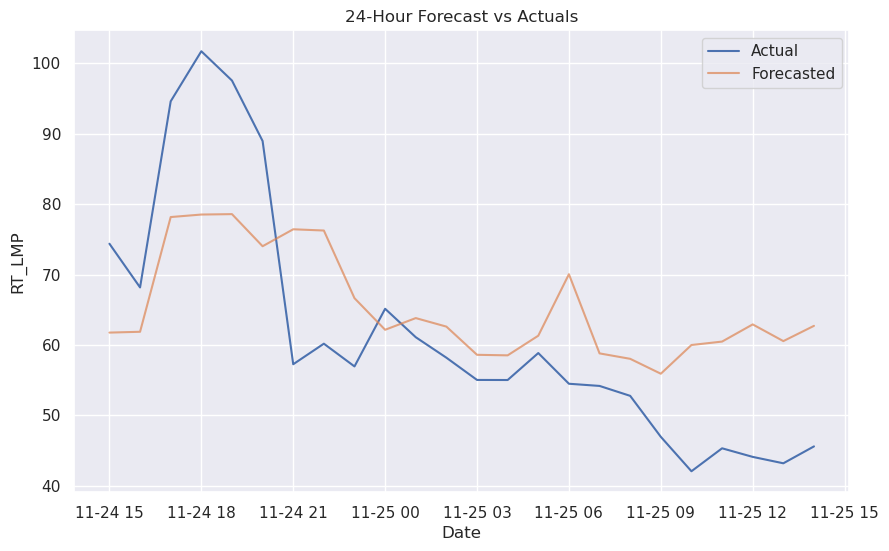

[CV] END ....svr__C=0.1, svr__epsilon=0.01, svr__gamma=0.001; total time=   2.6s
[CV] END .........svr__C=0.1, svr__epsilon=1, svr__gamma=0.1; total time=   1.9s
[CV] END ........svr__C=1, svr__epsilon=0.01, svr__gamma=0.1; total time=   1.6s
[CV] END .........svr__C=1, svr__epsilon=1, svr__gamma=0.001; total time=   1.6s
[CV] END ......svr__C=10, svr__epsilon=0.01, svr__gamma=0.01; total time=   1.6s
[CV] END .......svr__C=10, svr__epsilon=0.1, svr__gamma=0.01; total time=   1.7s
[CV] END ..........svr__C=10, svr__epsilon=1, svr__gamma=0.1; total time=   1.7s
[CV] END .....svr__C=100, svr__epsilon=0.1, svr__gamma=0.001; total time=   1.7s
[CV] END .......svr__C=100, svr__epsilon=1, svr__gamma=0.001; total time=   1.6s
[CV] END ........svr__C=0.1, svr__epsilon=0.01, svr__gamma=1; total time=   2.1s
[CV] END ......svr__C=0.1, svr__epsilon=0.1, svr__gamma=0.01; total time=   1.7s
[CV] END ...........svr__C=0.1, svr__epsilon=1, svr__gamma=1; total time=   1.6s
[CV] END ........svr__C=1, s

In [10]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

best_model = grid_search.best_estimator_

hours_to_predict = 24
if len(X_test) >= hours_to_predict:
    X_next_24_hours = X_test[:hours_to_predict]
    y_next_24_hours = y_test[:hours_to_predict]

    # Using the best model from GridSearchCV for prediction
    forecasted_values = best_model.predict(X_next_24_hours)

    forecast_index = pd.date_range(start=y_next_24_hours.index[0], periods=hours_to_predict, freq='H')
    forecast_series = pd.Series(forecasted_values, index=forecast_index)

    mae = mean_absolute_error(y_next_24_hours, forecast_series)
    mse = mean_squared_error(y_next_24_hours, forecast_series)
    rmse = np.sqrt(mse)
    r_squared = r2_score(y_next_24_hours, forecast_series)

    print(f"MAE for the first {hours_to_predict} hours: {mae}")
    print(f"MSE for the first {hours_to_predict} hours: {mse}")
    print(f"RMSE for the first {hours_to_predict} hours: {rmse}")
    print(f"R-squared for the first {hours_to_predict} hours: {r_squared}")

    # Plotting
    plt.figure(figsize=(10, 6))
    plt.plot(y_next_24_hours.index, y_next_24_hours, label='Actual')
    plt.plot(forecast_series.index, forecast_series, label='Forecasted', alpha=0.7)
    plt.title(f'{hours_to_predict}-Hour Forecast vs Actuals')
    plt.xlabel('Date')
    plt.ylabel('RT_LMP')
    plt.legend()
    plt.show()

else:
    print("Not enough data in test set to forecast 24 hours.")


MAE and RMSE are relatively low, which suggests that, on average, the model's predictions are not far off from the actual values in terms of absolute differences. The small scale of these errors can be viewed positively.
MSE is relatively higher, which emphasizes the presence of larger errors in some predictions, as MSE gives more weight to larger errors due to squaring the error terms.
R-squared: A negative R-squared value is concerning. It indicates that the model performs worse than a simple horizontal line drawn at the mean of the actual data values. This suggests that, despite relatively low MAE and RMSE, the model might be systematically biased or suffering from significant variance issues at specific points.